In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity/electricity-normalized.csv


In [2]:
df = pd.read_csv('/kaggle/input/electricity/electricity-normalized.csv')

In [3]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
# Assuming your dataframe is named 'df'
numeric_columns = ['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']

# Calculate descriptive statistics using pandas describe() function
statistics = df[numeric_columns].describe()

# Print the statistics
print(statistics)


           nswprice     nswdemand      vicprice     vicdemand      transfer
count  45312.000000  45312.000000  45312.000000  45312.000000  45312.000000
mean       0.057868      0.425418      0.003467      0.422915      0.500526
std        0.039991      0.163323      0.010213      0.120965      0.153373
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.035127      0.309134      0.002277      0.372346      0.414912
50%        0.048652      0.443693      0.003467      0.422915      0.414912
75%        0.074336      0.536001      0.003467      0.469252      0.605702
max        1.000000      1.000000      1.000000      1.000000      1.000000


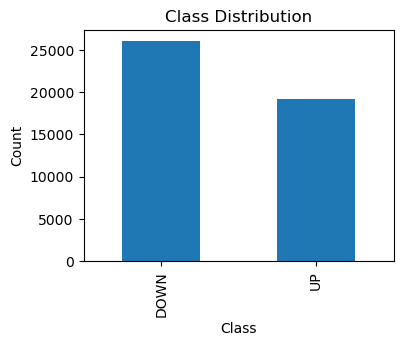

In [6]:
# Bar plot of class distribution
plt.figure(figsize=(4, 3))
df['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

DOWN    26075

UP      19237

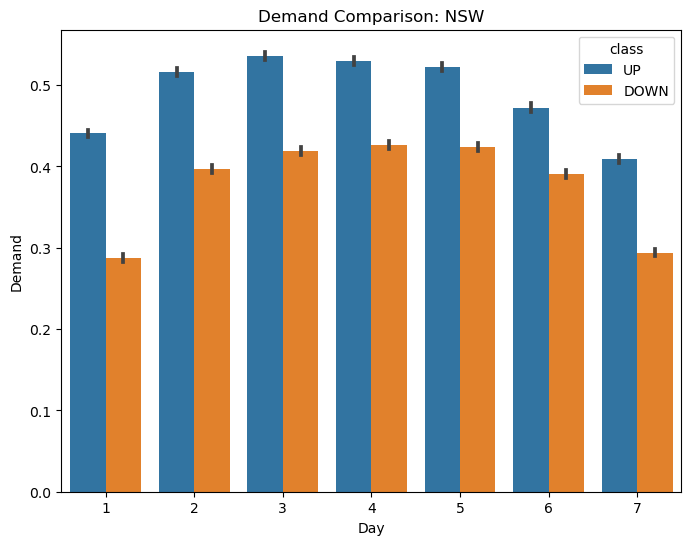

In [7]:

# Bar chart of demand for NSW and Victoria by day
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='day', y='nswdemand', hue='class')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Comparison: NSW')
plt.show()


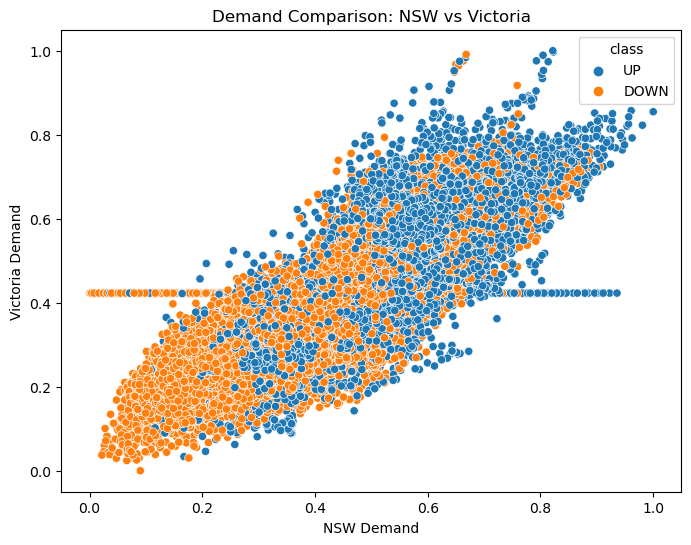

In [8]:
# Scatter plot of demand for NSW and Victoria
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nswdemand', y='vicdemand', hue='class')
plt.xlabel('NSW Demand')
plt.ylabel('Victoria Demand')
plt.title('Demand Comparison: NSW vs Victoria')
plt.show()


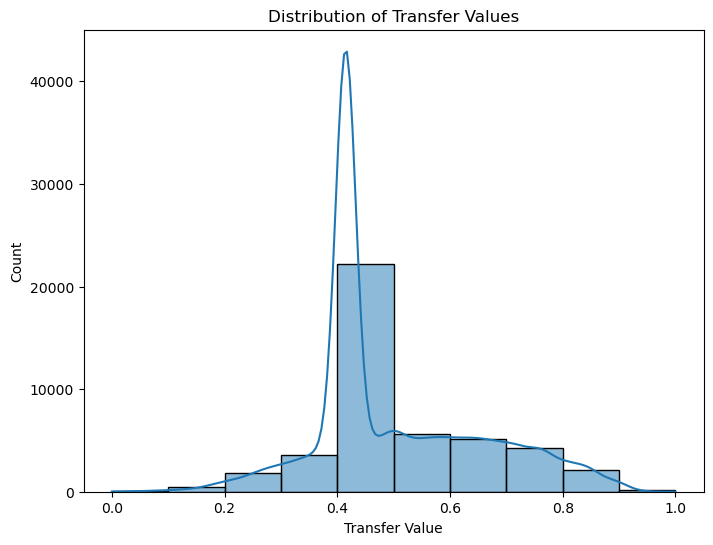

In [9]:


# Histogram of transfer values
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='transfer', bins=10, kde=True)
plt.xlabel('Transfer Value')
plt.ylabel('Count')
plt.title('Distribution of Transfer Values')
plt.show()

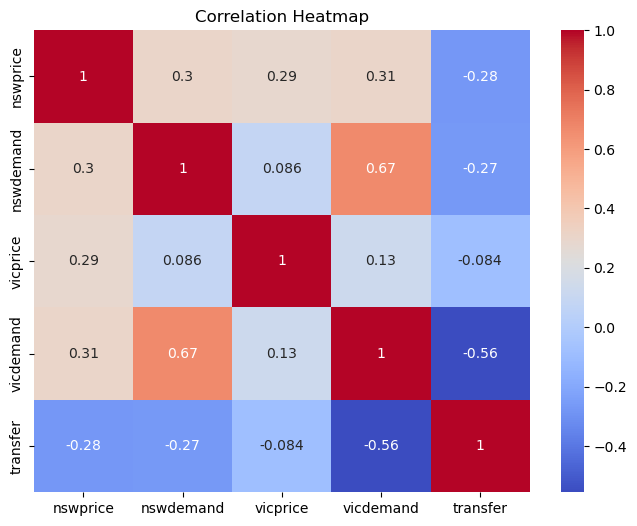

In [10]:
# Heatmap of correlation between numerical columns
plt.figure(figsize=(8, 6))
corr = df[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

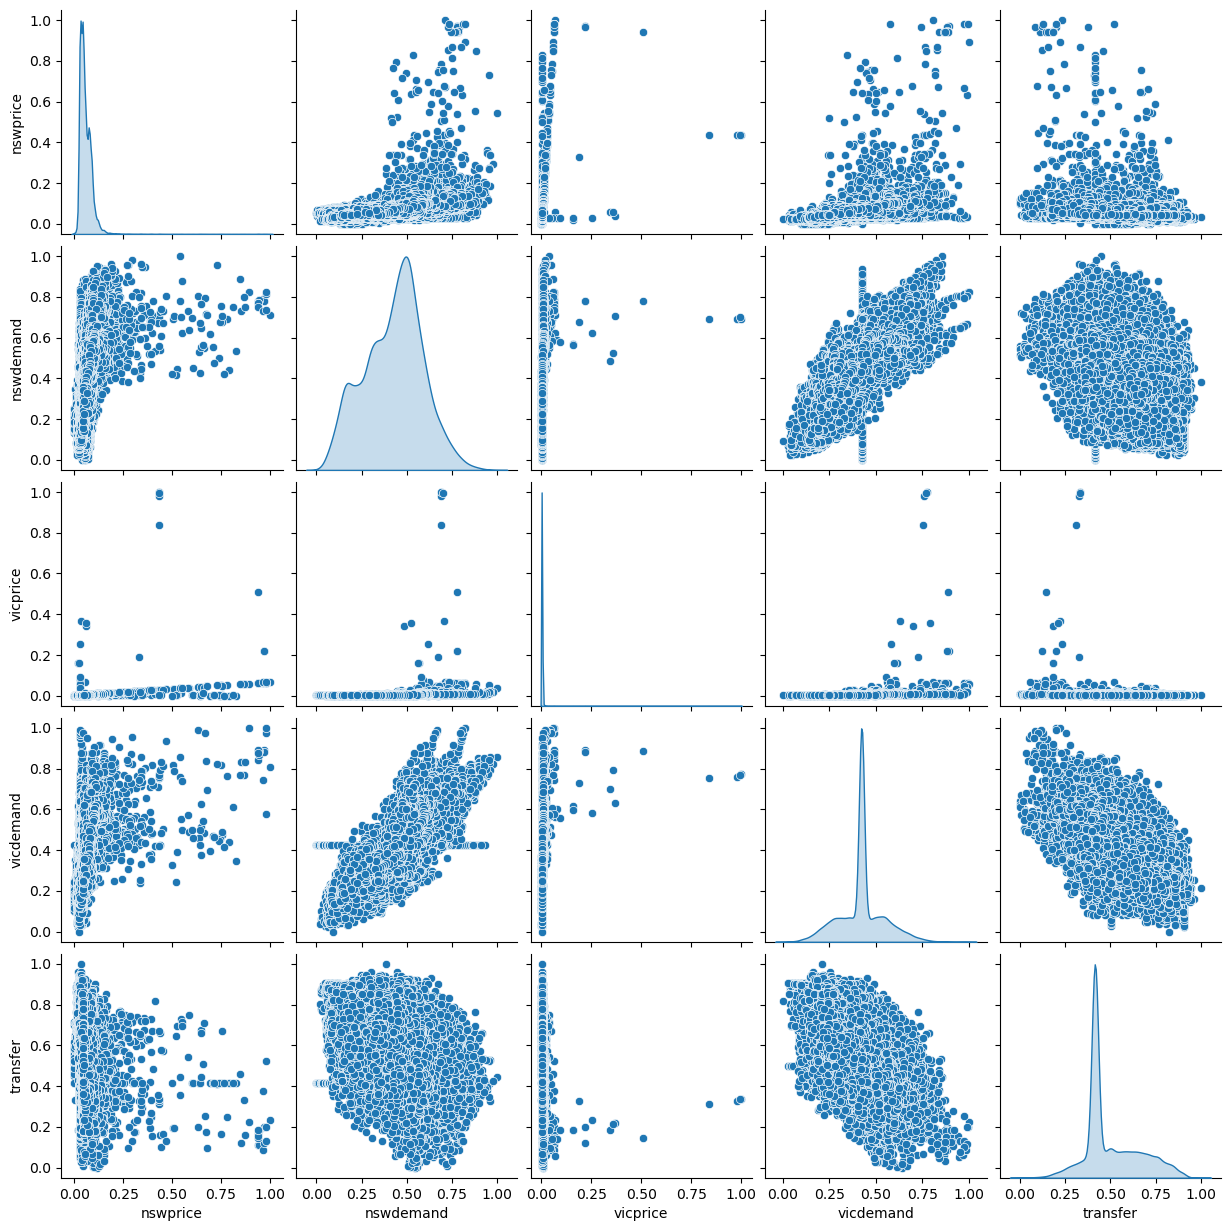

In [11]:
# Pairplot of numerical columns
sns.pairplot(data=df[['nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']], diag_kind='kde')
plt.show()

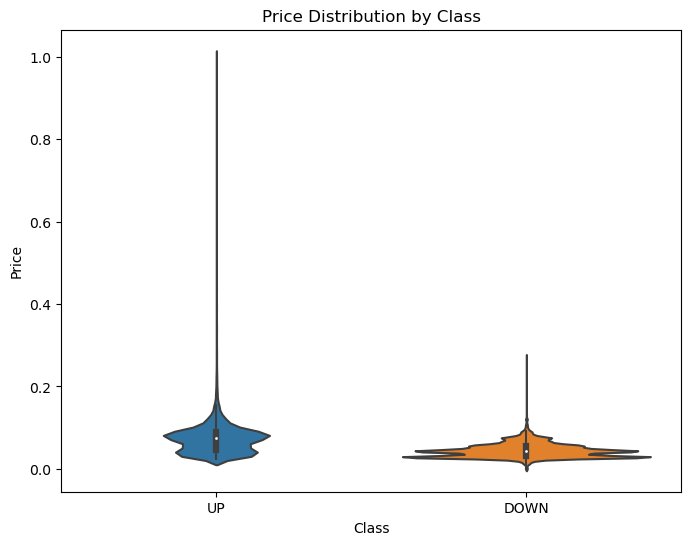

In [12]:
# Violin plot of price distribution by class
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='class', y='nswprice')
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Price Distribution by Class')
plt.show()

<Figure size 800x600 with 0 Axes>

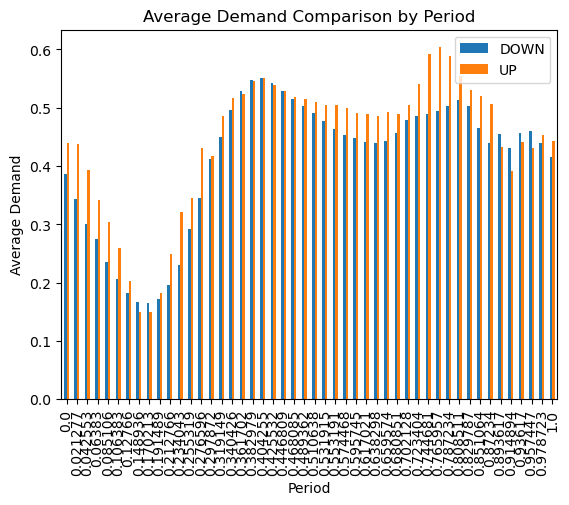

In [13]:
# Grouped bar chart of average demand by period and class
plt.figure(figsize=(8, 6))
df_avg_demand = df.groupby(['period', 'class']).mean()['nswdemand'].unstack()
df_avg_demand.plot(kind='bar')
plt.xlabel('Period')
plt.ylabel('Average Demand')
plt.title('Average Demand Comparison by Period')
plt.legend(loc='upper right')
plt.show()


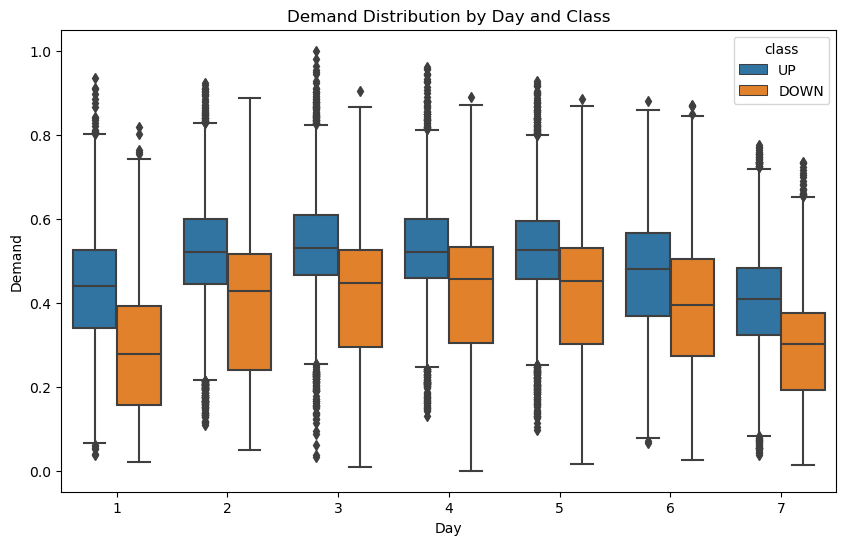

In [14]:
# Box plot of demand distribution by day and class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day', y='nswdemand', hue='class')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('Demand Distribution by Day and Class')
plt.show()

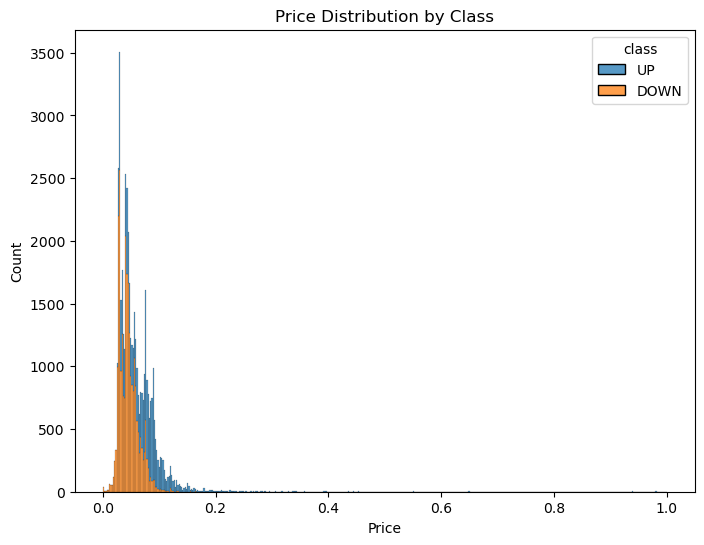

In [15]:
# Histogram of price distribution by class
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='nswprice', hue='class', multiple='stack')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution by Class')
plt.show()

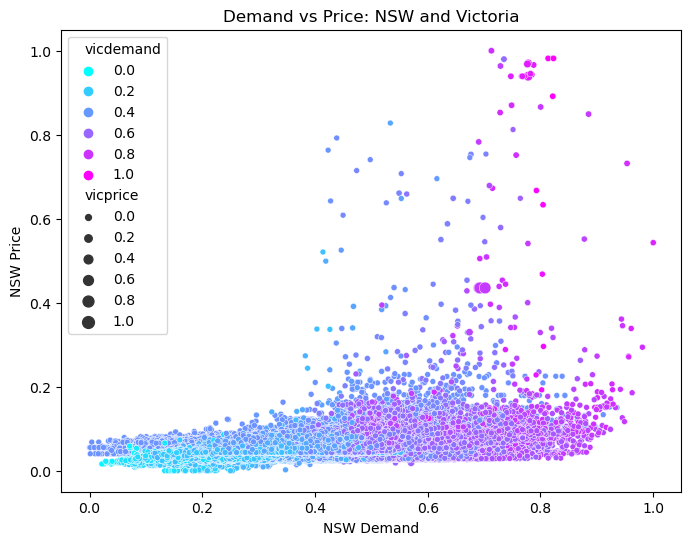

In [16]:
# Scatter plot of demand vs price for NSW and Victoria
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='nswdemand', y='nswprice', hue='vicdemand', palette='cool', size='vicprice')
plt.xlabel('NSW Demand')
plt.ylabel('NSW Price')
plt.title('Demand vs Price: NSW and Victoria')
plt.show()

In [17]:
# Assuming your dataframe is named 'df'
class_mapping = {'UP': 0, 'DOWN': 1}

# Map the class values using the mapping dictionary
df_ = df
df_['class'] = df['class'].map(class_mapping)


In [18]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,0
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,0
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,0
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,0
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,1


In [19]:

# Split the data into features and target
X = df_.drop('class', axis=1)
y = df_['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to try
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

# Define a dictionary to store the evaluation metrics
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Log Loss': []
}

# Train and evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    loss = log_loss(y_test, y_pred)

    # Store the metrics in the dictionary
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)
    metrics['Log Loss'].append(loss)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, index=[type(classifier).__name__ for classifier in classifiers])


In [20]:
metrics_df = pd.DataFrame(metrics_df)
metrics_df

,Accuracy,Precision,Recall,F1-score,Log Loss
DecisionTreeClassifier,0.881827,0.881754,0.881827,0.881786,4.259379
RandomForestClassifier,0.905660,0.905565,0.905660,0.905473,3.400345
SVC,0.741918,0.747262,0.741918,0.733323,9.302229
KNeighborsClassifier,0.807900,0.807262,0.807900,0.807288,6.923977
LogisticRegression,0.751186,0.756225,0.751186,0.743591,8.968160


In [21]:
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-score': [f1],
})

# Print the metrics table
print(metrics_df)

   Accuracy  Precision    Recall  F1-score
0  0.914156    0.91406  0.914156  0.914059


##### As you see the best algorism for this data is ( XGBoost )